# Graficzna wizualizacja danych z użyciem bibliotek `matplotlib` i `seaborn`


Jedną z ważnych części analizy danych jest wizualizacja graficzna. Może to być częścią procesu badawczego - na przykład, aby pomóc zidentyfikować emisje lub wymagane
przekształcanie danych lub jako sposób na generowanie pomysłów na modele. Python ma wiele dodatkowych bibliotek do tworzenia statycznych lub dynamicznych wizualizacji, ale skupimy się głównie na `matplotlib` i bibliotekach, które na nim budują.
podstawa.

Z biegiem czasu `matplotlib` stworzyło wiele dodatkowych zestawów narzędzi do wizualizacji danych, które wykorzystują `matplotlib` jako „rdzeń”. Jednym z takich narzędzi jest `seaborn`.


# Krótki przykład użycia `matplotlib`
<div id = "visual: matplotlib"> </div>

Aby zaimportować bibliotekę `matplotlib`, użyjemy następującej konwencji:

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt

Poniżej znajduje się przykład wykreślenia linii prostej:

In [6]:
import numpy as np

In [7]:
data = np.arange(10)

In [8]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

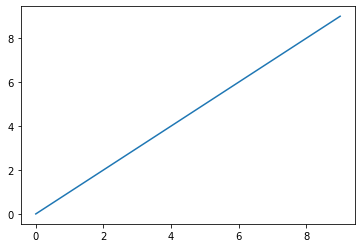

In [9]:
plt.plot(data)

## Rysunki i wykresy pomocnicze
<div id="visual:matplotlib:figs_and_subplots"></div>

Wykresy w `matplotlib` znajdują się wewnątrz obiektu ` Figure`. Nową figurę można utworzyć za pomocą `plt.figure`:

In [10]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

W interpreterze IPythona zostanie wyrenderowane puste okno, aw notatniku Jupyter nic się nie stanie. Nie możesz utworzyć okna z pustym obrazem. Musisz utworzyć jeden lub więcej wykresów pomocniczych (subplots) za pomocą funkcji `add_subplot`

In [17]:
ax1 = fig.add_subplot(2, 2, 1)

Oznacza to, że figura musi mieć rozmiar 2 $ \times2 $ (tj. zawierać maksymalnie 4 wykresy), a my wybraliśmy pierwszy z czterech wykresów (numeracja zaczyna się od jednego). Można wybrać następujące 2 wykresy:

In [21]:
ax2 = fig.add_subplot(2, 2, 2)

In [22]:
ax3 = fig.add_subplot(2, 2, 3)

Jeśli wykonasz polecenie kreślenia, na przykład `plt.plot([1.5, 3.5, -2, 1.6])`, dane wyjściowe zostaną wykonane na ostatnim wykresie ostatnio utworzonej figury. Na przykład wykonanie polecenia

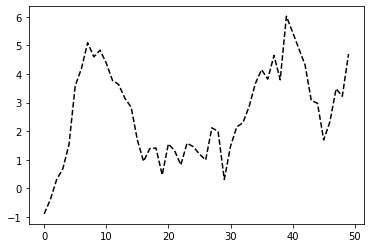

In [13]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

Wyrażenie 'k--' określa styl linii: czarna linia przerywana. Metoda `fig.add_subplot` zwraca obiekt` AxesSubplot`, do którego można bezpośrednio wykreślić wykres:

In [23]:
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

(array([ 2.,  4.,  1.,  6.,  5.,  8.,  6.,  5., 13., 10.,  9.,  9.,  4.,
         5.,  2.,  2.,  4.,  2.,  2.,  1.]),
 array([-1.99658463, -1.75585517, -1.51512572, -1.27439627, -1.03366681,
        -0.79293736, -0.55220791, -0.31147845, -0.070749  ,  0.16998045,
         0.4107099 ,  0.65143936,  0.89216881,  1.13289826,  1.37362772,
         1.61435717,  1.85508662,  2.09581607,  2.33654553,  2.57727498,
         2.81800443]),
 <BarContainer object of 20 artists>)

In [24]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

Pełny katalog typów wykresów można znaleźć pod adresem <https://matplotlib.org/>.

Jak widać powyższe polecenia, które są wykonywane w osobnych komórkach, nie działają w notatniku Jupyter. Aby zbudować podwykresy w Jupyter, musisz wykonać wszystkie polecenia w jednej komórce:

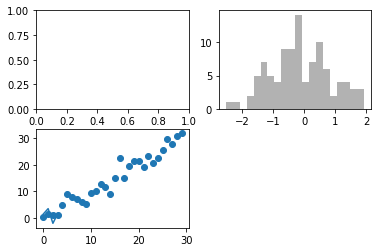

In [25]:
fig = plt.figure()
fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
plt.plot([1.5, 3.5, -2, 1.6])
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

## Kolor, znaczniki i style linii
<div id="visual:matplotlib:colors"></div>

Główna funkcja `plot` biblioteki`matplotlib` przyjmuje tablice współrzędnych `x` i` y` oraz (opcjonalnie) ciąg znaków określający kolor i styl linii. Na przykład, aby wykreślić zależność `y` od `x` zielonymi pociągnięciami, musisz wykonać:

```Python
        ax.plot(x, y, 'g--')
```

W związku z tym ustawiliśmy zarówno kolor, jak i styl linii jako ciąg. W praktyce przy programowym tworzeniu wykresów używanie ciągów nie jest wygodne. Ten sam wykres można wykreślić za pomocą polecenia:

```Python
        ax.plot(x, y, linestyle='--', color='g')
```

Wykresy mogą mieć również znaczniki do podświetlania punktów danych. Ponieważ `matplotlib` tworzy linie ciągłe poprzez interpolację wartości między podanymi punktami, może nie być jasne, gdzie znajdują się podane wartości. Znaczniki mogą być częścią ciągu znaków, który definiuje styl linii:

In [26]:
from numpy.random import randn

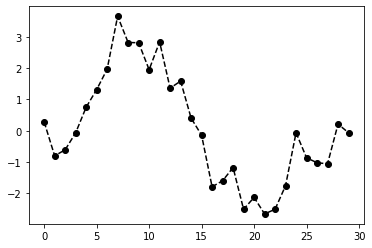

In [27]:
plt.plot(randn(30).cumsum(), 'ko--')

Można to było napisać bardziej w sposób jawny:

```Python
        plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')
```

Jak widać, interpolacja liniowa budowana jest pomiędzy kolejnymi punktami. To zachowanie można zmienić za pomocą parametru `drawstyle`:

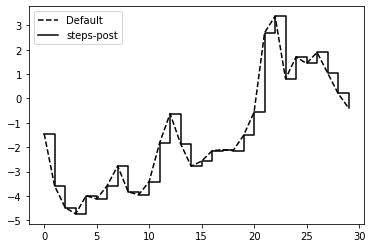

In [28]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

## Etykiety osi, skala i legenda
<div id="visual:matplotlib:ticks"></div>

Aby zilustrować, jak dostosować wykresy, utwórzmy prosty rysunek i wyświetlmy wykres błądzenia losowego:

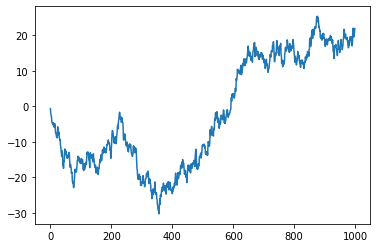

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

Aby zmienić etykiety na osi $x$, użyjemy metod `set_xticks`
a `set_xticklables`:

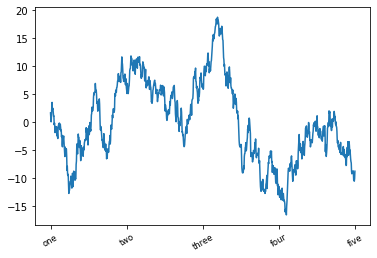

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

Parametr `rotation` obraca etykiety etykiet na osi $x$ o 30 stopni. Na koniec ustaw tytuł i etykietę wykresu dla osi $x$ za pomocą metod `set_title` i `set_xlabel`:

Text(0.5, 0, 'Kroki')

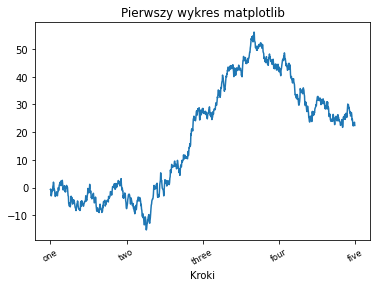

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_title('Pierwszy wykres matplotlib')
ax.set_xlabel('Kroki')

Oś $y$ jest modyfikowana dokładnie w ten sam sposób, tylko musisz zamienić `x` na `y` w powyższym kodzie. Klasa osi ma metodę `set`, która umożliwia grupowe ustawianie właściwości wykresu. W poprzednim przykładzie możesz również napisać:

```Python
        props = {
            'title': 'Pierwszy wykres matplotlib',
            'xlabel': 'Kroki'
        }
        ax.set(**props)
```

Istnieje kilka sposobów wyświetlania legendy wykresu. Najprostszym jest przekazanie argumentu `label` podczas kreślenia wykresów:

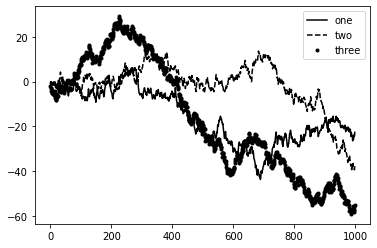

In [32]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

## Zapisywanie rysunków do pliku
<div id="visual:matplotlib:saving"></div>

Aktywny rysunek można zapisać do pliku za pomocą metody `plt.savefig`. Na przykład, aby zapisać rysunek w formacie SVG, po prostu wpisz:

```Python
        plt.savefig('figpath.svg')
```

Typ pliku zależy od rozszerzenia. Istnieje kilka ważnych parametrów: `dpi`, który określa rozdzielczość obrazu (kropki na cal), `bbox_inches`, który może przyciąć białą przestrzeń wokół obrazu. Na przykład, aby zapisać ten sam wykres w formacie PNG w rozdzielczości 400 DPI, wykonuj:

```Python
        plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
```

Funkcja `savefig` zapisuje nie tylko na dysku. Może zapisać wykres do dowolnego obiektu plikopodobnego, na przykład `BytesIO`:

```Python
        from io import BytesIO
        buffer = BytesIO()
        plt.savefig(buffer)
        plot_data = buffer.getvalue()
```

## Tabela 1 : Metoda `savefig`: parametry


<table border="1">
<thead>
<tr><th align="left">        Parametr        </th> <th align="left">                                                   Opis                                                   </th> </tr>
</thead>
<tbody>
<tr><td align="left">   <code>fname</code>                     </td> <td align="left">   Ciąg znaków zawierający ścieżkę do pliku lub podobnego do pliku obiektu Pythona. Format obrazu zależy od rozszerzenia pliku    </td> </tr>
<tr><td align="left">   <code>dpi</code>                       </td> <td align="left">   Rozdzielczość obrazu w punktach na cal. Domyślnie 100                                                             </td> </tr>
<tr><td align="left">   <code>facecolor</code>, <code>edgecolor</code>    </td> <td align="left">   Kolor tła obrazu poza wykresem. Domyślny <code>w</code> (белый)                                                           </td> </tr>
<tr><td align="left">   <code>format</code>                    </td> <td align="left">  Jawny format pliku                                                                                       </td> </tr>
<tr><td align="left">   <code>bbox_inches</code>               </td> <td align="left">   Część rysunku do zapisania. Jeśli podano <code>'tight'</code>, 2 spróbuje przyciąć pustą przestrzeń dookoła           </td> </tr>
</tbody>
</table>




<!-- Local Variables: -->
<!-- doconce-chapter-nickname: "visual" -->
<!-- doconce-section-nickname: "matplotlib" -->
<!-- End: -->



# Konstruowanie wykresów z pomocą `pandas` a `seaborn`
<div id="visual:plt-with-pandas"></div>

Biblioteka `matplotlib` może być dość niskopoziomowym narzędziem. Wykres składa się z podstawowych elementów: wyświetlacza danych (tj. typu wykresu: linia, pasek, prostokąt, punkt rozproszenia, konturu itp.), legendy, tytułu, etykiet i innych adnotacji. W bibliotece `pandas` możemy uzyskać wiele kolumn danych, a także etykiety wierszy i kolumn. Pandas ma wbudowane metody, które ułatwiają renderowanie obiektów `DataFrame` i `Series`. Inną biblioteką do tworzenia wykresów statystycznych jest `seaborn`.

In [34]:
import numpy as np
import  pandas as pd

## Wykresy liniowe
<div id="visual:plt-with-pandas:line"></div>

Obiekty `Series` i` DataFrame` mają metodę `plot` do tworzenia podstawowych typów wykresów. Domyślnie `plot()` tworzy wykresy liniowe

<AxesSubplot:>

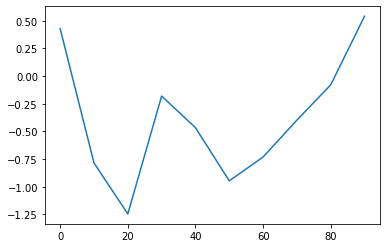

In [35]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

Indeks obiektu `Series` jest przekazywany do ` plot` biblioteki `matplotlib` dla osi $ x $. Jednak to zachowanie można wyłączyć za pomocą parametru `use_index = False`. Tabela [visual:plt-with-pandas:tbl:1](#visual:plt-with-pandas:tbl:1) zawiera pełną listę parametrów funkcji `Series.plot`.

Większość metod kreślenia pand akceptuje opcjonalny parametr `ax`, którym może być obiekt`subplot`. Pozwala to na umieszczenie wykresów podrzędnych na siatce.




## Tabela 2 : Parametry metody `Series.plot` <div id="visual:plt-with-pandas:tbl:1"></div>


<table border="1">
<thead>
<tr><th align="left">  Parametr </th> <th align="left">                                                   Opis                                                   </th> </tr>
</thead>
<tbody>
<tr><td align="left">   <code>label</code>        </td> <td align="left">   Etykieta legendy                                                                                                </td> </tr>
<tr><td align="left">   <code>ax</code>           </td> <td align="left">   Obiekt <code>subplot</code> z <code>matplotlib</code>, w który wyświetla się wykres. Jeśli nie jest ustawiony - wyjście trafia do aktywnego podwykresu    </td> </tr>
<tr><td align="left">   <code>style</code>        </td> <td align="left">   Ciąg znaków określający styl wykresu (na przykład <code>ko--</code>)                                                                </td> </tr>
<tr><td align="left">   <code>alpha</code>        </td> <td align="left">   Przezroczystość wypełniania wykresu (od 0 do 1)                                                                      </td> </tr>
<tr><td align="left">   <code>kind</code>         </td> <td align="left">   Typ wykresu. Być może: 'area' , 'bar' , 'barh' , 'density', 'hist' , 'kde' , 'line' , 'pie'                    </td> </tr>
<tr><td align="left">   <code>logy</code>         </td> <td align="left">   Czy używać skali logarytmicznej na osi <code>y</code>                                                               </td> </tr>
<tr><td align="left">   <code>use_index</code>    </td> <td align="left">   Czy używać obiektu indeksu dla etykiet osi                                                                      </td> </tr>
<tr><td align="left">   <code>rot</code>          </td> <td align="left">   Etykiety osi obrotowych                                                                                               </td> </tr>
<tr><td align="left">   <code>xticks</code>       </td> <td align="left">   Wartości etykiety osi <code>x</code>                                                                                       </td> </tr>
<tr><td align="left">   <code>yticks</code>       </td> <td align="left">   Wartości etykiety osi <code>y</code>                                                                                       </td> </tr>
<tr><td align="left">   <code>xlim</code>         </td> <td align="left">   Granice osi <code>x</code> (na przykład, <code>[0, 10]</code>)                                                                         </td> </tr>
<tr><td align="left">   <code>ylim</code>         </td> <td align="left">   Granice osi <code>y</code>                                                                                               </td> </tr>
<tr><td align="left">   <code>grid</code>         </td> <td align="left">   Czy wyświetlać siatkę wzdłuż osi (domyślnie włączone)                                                              </td> </tr>
</tbody>
</table>


Metoda `plot` obiektu `DataFrame` wyświetla wykres dla każdej kolumny danych jako linię na tym samym wykresie podrzędnym, tworząc automatycznie legendę:

In [36]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))

<AxesSubplot:>

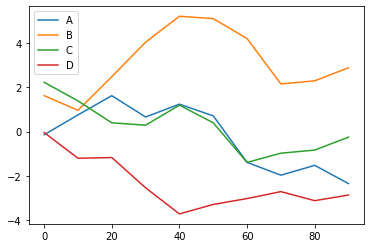

In [37]:
df.plot()

Atrybut plot zawiera „rodzinę” metod dla różnych typów wykresów. Na przykład `df.plot()` jest równoważne `df.plot.line()`.

W ramce „DataFrame” znajduje się kilka parametrów, które zapewniają pewną elastyczność podczas obsługi kolumn. Na przykład, jeśli umieścisz je wszystkie na jednym wykresie podrzędnym lub stworzysz osobne. W tabeli [visual:plt-with-pandas:tbl:2](#visual:plt-with-pandas:tbl:2) takie parametry są prezentowane.


## Tabela 3 : Specyficzne dla `DataFrame` parametry `plot` <div id="visual:plt-with-pandas:tbl:2"></div>


<table border="1">
<thead>
<tr><th align="left">   Parametr   </th> <th align="left">                                   Opis                                   </th> </tr>
</thead>
<tbody>
<tr><td align="left">   <code>subplots</code>        </td> <td align="left">   Czy rysować każdą kolumnę <code>DataFrame</code> w osobnym podwykresie                     </td> </tr>
<tr><td align="left">   <code>sharex</code>          </td> <td align="left">   Jeśli <code>subplots=True</code>, czy używać tej samej osi <code>x</code>, łącząc etykiety osi    </td> </tr>
<tr><td align="left">   <code>sharey</code>          </td> <td align="left">   Jeśli <code>subplots=True</code>, czy używać tej samej osi <code>y</code>                        </td> </tr>
<tr><td align="left">   <code>figsize</code>         </td> <td align="left">   Rozmiar obrazu do utworzenia jako krotki                                        </td> </tr>
<tr><td align="left">   <code>title</code>           </td> <td align="left">   Tytuł obrazu jako ciąg znaków                                                  </td> </tr>
<tr><td align="left">   <code>legend</code>          </td> <td align="left">  Czy dodać legendę do obrazu (domyślnie <code>True</code>)                             </td> </tr>
<tr><td align="left">   <code>sort_columns</code>    </td> <td align="left">   Czy wyświetlać kolumny alfabetycznie                                      </td> </tr>
</tbody>
</table>

## Wykresy kolumnowe
<div id="visual:plt-with-pandas:bar"></div>

Metody `plot.bar()` i `plot.barh()` kreślą w pionie i
poziome wykresy słupkowe. W tym przypadku indeksy obiektów `Series` i`DataFrame` jako etykiety na osi `x` (`bar`) lub `y` (`barh`).

<AxesSubplot:>

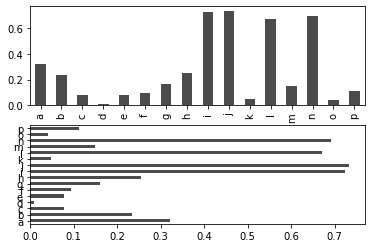

In [38]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

Parametry `color = 'k'` i` alpha = 0.7` ustawiają kolor wykresu na czarny i częściową przezroczystość dla wypełnienia.

W `DataFrame` wykresy słupkowe grupują każdy wiersz wartości w grupę słupków odpowiadających każdej wartości w wierszu:

In [41]:
df = pd.DataFrame(np.random.rand(6, 4), index=['one', 'two', 'three', 'four', 'five', 'six'], columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [42]:
df

Genus,A,B,C,D
one,0.060548,0.221787,0.190320,0.080174
two,0.109602,0.556449,0.050872,0.078976
three,0.226887,0.468124,0.309990,0.964131
four,0.635746,0.618987,0.279542,0.891694
five,0.807879,0.486794,0.377033,0.689685
six,0.583904,0.015346,0.707747,0.008571


<AxesSubplot:>

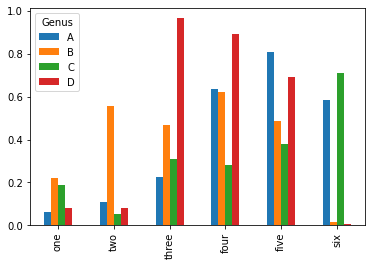

In [43]:
df.plot.bar()

Zauważ, że nazwa kolumny `'Genus'` jest używana jako tytuł legendy. Aby utworzyć skumulowane wykresy słupkowe, `DataFrame` jest ustawiane na `stacked = True`, co powoduje grupowanie wartości w każdym wierszu

<AxesSubplot:>

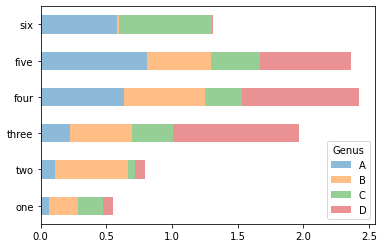

In [44]:
df.plot.barh(stacked=True, alpha=0.5)

Załóżmy, że mamy zestaw danych z rachunkami i napiwkami w restauracji i chcemy zbudować skumulowany wykres słupkowy pokazujący procent punktów danych dla każdej wielkości grupy każdego dnia. Załaduj dane z pliku
[tips.csv](tips.csv.txt) i stwórz podsumowanie według dnia i wielkości imprezy
(Liczba osób):

In [47]:
tips = pd.read_csv('tips.csv')

In [48]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [49]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [50]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [51]:
party_counts = party_counts.loc[:, 2:5]

Teraz znormalizujmy dane tak, aby suma w każdym wierszu wynosiła $1$ i zbudujmy wykres słupkowy:

In [52]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

In [53]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='day'>

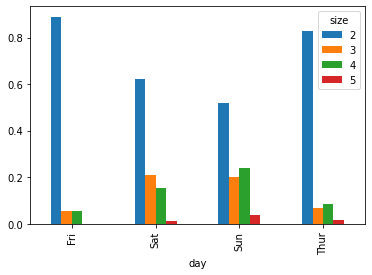

In [54]:
party_pcts.plot.bar()

Widać więc, że liczba uczestników imprezy w tym zestawie wzrasta w weekendy.

W przypadku, gdy musisz zagregować lub podsumować dane przed sporządzeniem wykresu, użycie pakietu `seaborn` może znacznie uprościć zadanie. Przyjrzyjmy się procentowi porad dziennie przy użyciu biblioteki `seaborn`:

In [55]:
import seaborn as sns

In [56]:
tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])

In [57]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

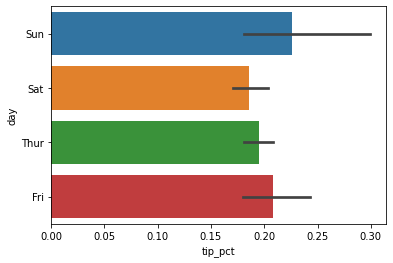

In [58]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

Funkcja `barplot` biblioteki` seaborn` pobiera parametr `data`, którym może być obiekt `DataFrame`. Pozostałe parametry odnoszą się do nazw kolumn. Ponieważ jest kilka obserwacji dziennie, słupki na wykresie reprezentują średnią parametru `tip_pct`. Czarne linie rysowane na słupkach wykresu reprezentują 95-procentowy przedział ufności (można go skonfigurować za pomocą opcjonalnego parametru).

Funkcja `barplot` posiada parametr `hue`, który pozwala podzielić wyświetlacz o dodatkową wartość kategoryczną:

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

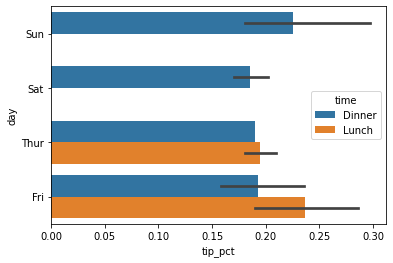

In [59]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

## Histogramy i wykresy gęstości rozkładu
<div id="visual:plt-with-pandas:hist"></div>

*Histogram* to rodzaj wykresu słupkowego, który dyskretnie wyświetla częstotliwość wartości. Utwórzmy histogram procentu całkowitego konta przy użyciu metody `plot.hist` obiektu` Series`:

<AxesSubplot:ylabel='Frequency'>

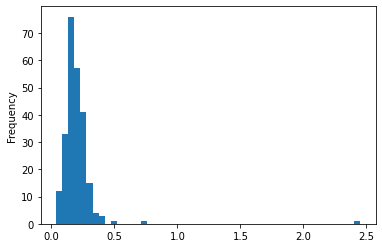

In [60]:
tips['tip_pct'].plot.hist(bins=50)

Powiązany typ wykresu histogramu to *wykres gęstości*, który jest generowany przez obliczenie szacunkowego ciągłego rozkładu prawdopodobieństwa, który zostałby wygenerowany na podstawie obserwowanych danych.
Zwykła procedura polega na aproksymacji tego rozkładu jako mieszaniny „rdzeń”, czyli prostszych rozkładów, takich jak rozkład normalny. Zatem wykresy pod wykresami gęstości mogą być również rozumiane jako wykresy oszacowania gęstości jądra (*K* ernel *D* ensity *E* stimate). Funkcje `plot.kde` i`plot.density` kreślą gęstość za pomocą podejścia KDE:

<AxesSubplot:ylabel='Density'>

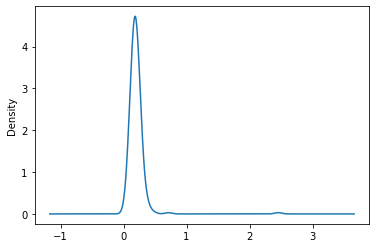

In [61]:
tips['tip_pct'].plot.kde()

Biblioteka `seaborn` ułatwia tworzenie histogramów i wykresów gęstości za pomocą metody `distplot`, która pozwala na jednoczesne wykreślenie histogramu i ciągłej oceny gęstości. Jako przykład rozważ rozkład bimodalny składający się z dwóch różnych standardowych rozkładów normalnych:

In [ ]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))

In [ ]:
sns.distplot(values, bins=100, color='k')

## Wykresy punktowe lub wykresy bitowe
<div id="visual:plt-with-pandas:scatter"></div>

Wykresy rozrzutu są przydatne do badania relacji między dwiema jednowymiarowymi seriami danych. Na przykład załadujmy zbiór danych z pliku
[macrodata.csv](macrodata.csv) projektu
[Statmodels](https://www.statsmodels.org/stable/index.html). Wybierzmy zmienne i obliczmy „różnice logarytmiczne”:

In [62]:
macro = pd.read_csv('macrodata.csv')

In [63]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [65]:
trans_data = np.log(data).diff().dropna()

In [66]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Teraz użyjmy funkcji `regplot` biblioteki `seaborn`, która kreśli wykresy punktowe i oferuje wykres regresji liniowej:

Text(0.5, 1.0, 'Zależność $\\log$ m1 od $\\log$ unemp')

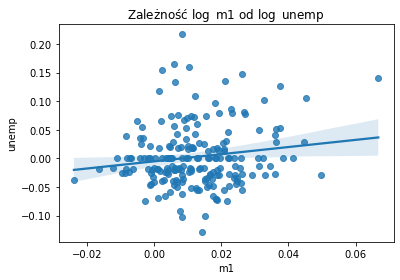

In [70]:
sns.regplot(x='m1', y='unemp', data=trans_data)
plt.title('Zależność $\log$ {} od $\log$ {}'.format('m1', 'unemp'))

Podczas analizy danych przydatna jest możliwość przeglądania wszystkich wykresów rozrzutu w grupie zmiennych, tj. *wykresy sparowane* lub *macierz wykresów rozrzutu*. Biblioteka `seaborn` ma do tego wygodną funkcję `pairplot`, która w szczególności obsługuje umieszczanie histogramów lub oszacowań gęstości każdej zmiennej wzdłuż przekątnej:

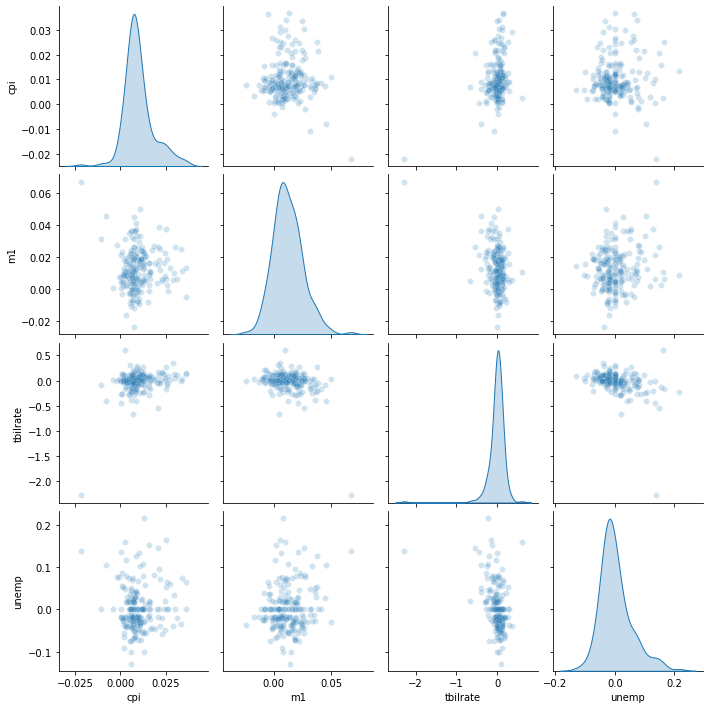

In [71]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

## Dane kategoryczne
<div id="visual:plt-with-pandas:facet-grids"></div>

Jednym ze sposobów wizualizacji danych z wieloma zmiennymi kategorialnymi jest użycie *siatki aspektów*. Biblioteka `seaborn` posiada przydatną funkcję `catplot`, która ułatwia tworzenie siatki faset:

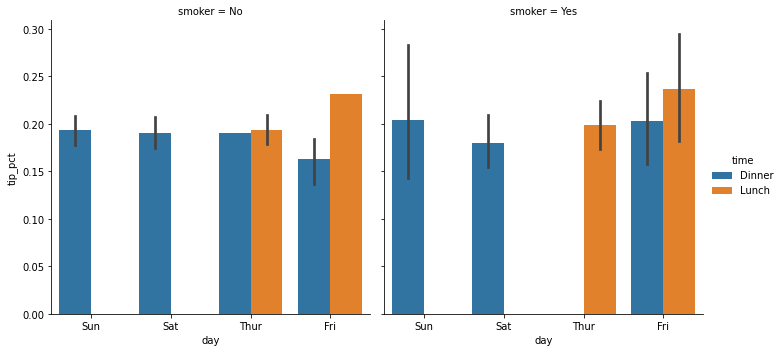

In [72]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

Zamiast wyświetlać różne kolory kolumn wykresu w aspekcie, możemy również rozszerzyć siatkę aspektów, dodając jeden wiersz naraz:

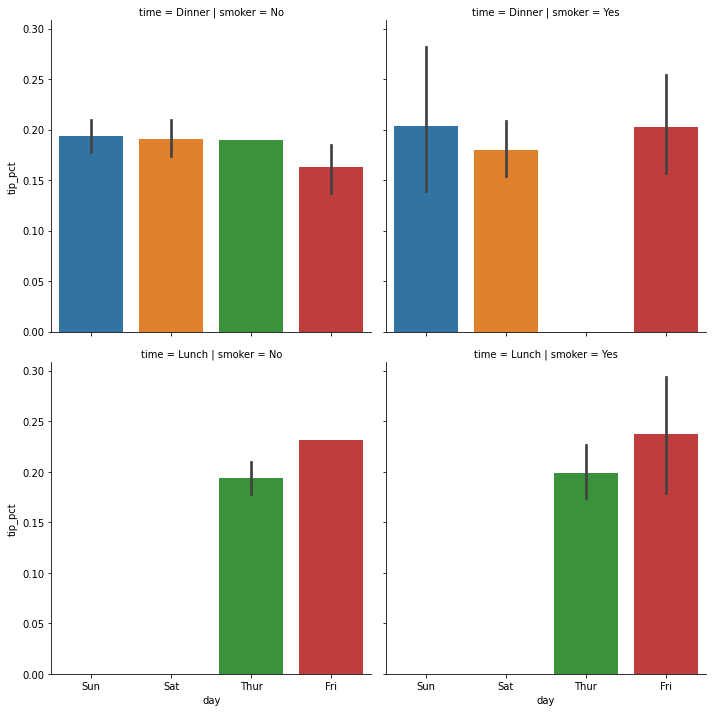

In [73]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

Funkcja `catplot` obsługuje inne rodzaje wykresów, które mogą być przydatne. Na przykład wykresy blokowe przedstawiające medianę, kwartyle i wartości odstające:

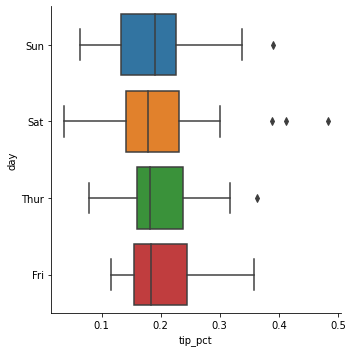

In [74]:
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])

Możesz tworzyć własne siatki faset,
używając bardziej ogólnej klasy `seaborn.FacetGrid` (patrz
[dokumentacja seaborn](https://seaborn.pydata.org/)).







<!-- Local Variables: -->
<!-- doconce-chapter-nickname: "visual" -->
<!-- doconce-section-nickname: "plt-with-pandas" -->
<!-- End: -->




<!-- Local Variables: -->
<!-- doconce-chapter-nickname: "visual" -->
<!-- End: -->